<a href="https://colab.research.google.com/github/Jubelo11/CN6000/blob/main/week%203%20Diabetes_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Diabetes Prediction with Artificial Neural Network (ANN)
This Colab notebook builds and evaluates an ANN model to predict diabetes using a CSV dataset.

In [4]:

!pip -q install -U tensorflow scikit-learn seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

print('✅ TensorFlow version:', tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)

✅ TensorFlow version: 2.20.0


## 📂 Step 2: Load your dataset
You can either:
- Mount Google Drive if your file is in Drive, or
- Upload directly from your computer.

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
# 🗂️ Option B — Upload directly from your computer
from google.colab import files
uploaded = files.upload()
import io
csv_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[csv_name]))
print(df.head())
print('\nClass counts:\n', df['Outcome'].value_counts())

Saving Diabetes_ANN.csv to Diabetes_ANN.csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    174.2           55.0           35.3      7.4  27.4   
1          0.0    127.9           47.9           39.7    238.8  36.3   
2         10.1     82.6           81.3            6.1     70.0  34.1   
3          6.0     96.0           35.9           15.3    209.5  25.0   
4          3.4    135.9           89.3           24.5     63.0  34.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.200  22.2        1  
1                     0.300  42.8        0  
2                     0.700  27.3        1  
3                     0.078  37.0        1  
4                     0.400  29.6        1  

Class counts:
 Outcome
1    3320
0    1680
Name: count, dtype: int64


## ⚙️ Step 3: Train the ANN model

In [6]:
# Split dataset
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Build ANN
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5971 - loss: 0.8823 - val_accuracy: 0.6500 - val_loss: 0.8277
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6526 - loss: 0.8110 - val_accuracy: 0.6500 - val_loss: 0.7812
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6630 - loss: 0.7693 - val_accuracy: 0.6500 - val_loss: 0.7455
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6643 - loss: 0.7353 - val_accuracy: 0.6500 - val_loss: 0.7202
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6625 - loss: 0.7130 - val_accuracy: 0.6500 - val_loss: 0.7011
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6625 - loss: 0.6926 - val_accuracy: 0.6500 - val_loss: 0.6872
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6625 - loss: 0.6780 - val_accuracy: 0.6500 - val_loss: 0.6769
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6625 - loss: 0.6654 - val_accu

## 📊 Step 4: Visualize training progress

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 🧮 Step 5: Evaluate model performance

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


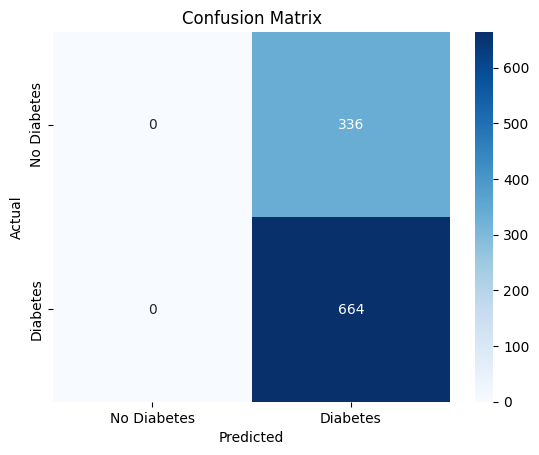

Accuracy: 0.664
Precision: 0.664
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [7]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))